In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [4]:
dataframe = pd.read_csv('pokemon_tratado.csv')
print(dataframe.head(10))

                        Name        HP    Attack   Defense   Sp. Atk  \
0                  Bulbasaur -0.970484 -0.972927 -0.830806 -0.245426   
1                    Ivysaur -0.403078 -0.567802 -0.374807  0.217526   
2                   Venusaur  0.353464  0.055468  0.276621  0.834796   
3      VenusaurMega Venusaur  0.353464  0.616410  1.579475  1.513792   
4                 Charmander -1.197446 -0.879437 -1.026234 -0.399744   
5                 Charmeleon -0.478732 -0.505475 -0.537664  0.217526   
6                  Charizard  0.277810  0.117795  0.113764  1.112567   
7  CharizardMega Charizard X  0.277810  1.551315  1.188619  1.760700   
8  CharizardMega Charizard Y  0.277810  0.741064  0.113764  2.655741   
9                   Squirtle -1.008311 -1.004091 -0.309664 -0.708379   

    Sp. Def     Speed  Generation  Legendary  
0 -0.256412 -0.807609           1      False  
1  0.292971 -0.302739           1      False  
2  1.025480  0.370421           1      False  
3  1.757990  0.3704

In [5]:
names = dataframe['Name'].values
numeric_cols = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'] 


# 2) extrair X (colunas numéricas a serem usadas no clustering)
X = dataframe[numeric_cols].copy()

print(dataframe.head(10))

                        Name        HP    Attack   Defense   Sp. Atk  \
0                  Bulbasaur -0.970484 -0.972927 -0.830806 -0.245426   
1                    Ivysaur -0.403078 -0.567802 -0.374807  0.217526   
2                   Venusaur  0.353464  0.055468  0.276621  0.834796   
3      VenusaurMega Venusaur  0.353464  0.616410  1.579475  1.513792   
4                 Charmander -1.197446 -0.879437 -1.026234 -0.399744   
5                 Charmeleon -0.478732 -0.505475 -0.537664  0.217526   
6                  Charizard  0.277810  0.117795  0.113764  1.112567   
7  CharizardMega Charizard X  0.277810  1.551315  1.188619  1.760700   
8  CharizardMega Charizard Y  0.277810  0.741064  0.113764  2.655741   
9                   Squirtle -1.008311 -1.004091 -0.309664 -0.708379   

    Sp. Def     Speed  Generation  Legendary  
0 -0.256412 -0.807609           1      False  
1  0.292971 -0.302739           1      False  
2  1.025480  0.370421           1      False  
3  1.757990  0.3704

In [6]:
# 4) varredura de k (2..10) com métricas
ks = list(range(2,11))
results = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    inertia = km.inertia_
    results.append({'k':k,'silhouette':sil,'davies_bouldin':db,'calinski_harabasz':ch,'inertia':inertia})
res_df = pd.DataFrame(results).set_index('k')
print("\nMetrics per k:\n", res_df)


Metrics per k:
     silhouette  davies_bouldin  calinski_harabasz      inertia
k                                                             
2     0.293036        1.271251         528.861646  4475.945595
3     0.256181        1.739880         387.003692  3889.638448
4     0.226972        1.623142         323.061611  3521.386723
5     0.232952        1.527047         292.168308  3210.240300
6     0.230953        1.470487         266.697986  2991.232624
7     0.224500        1.408893         246.581212  2820.323655
8     0.181094        1.434876         231.077346  2675.435113
9     0.164187        1.504170         221.271203  2531.535982
10    0.162455        1.501340         209.570320  2431.655332


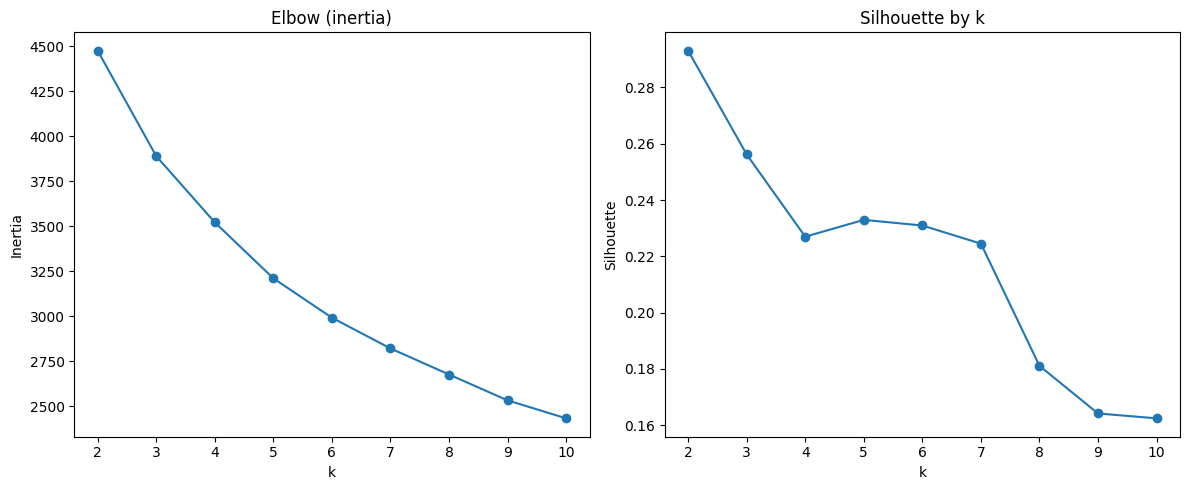

In [7]:
# 5) plots: elbow (inertia) e silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(res_df.index, res_df['inertia'], marker='o')
plt.title('Elbow (inertia)')
plt.xlabel('k'); plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(res_df.index, res_df['silhouette'], marker='o')
plt.title('Silhouette by k')
plt.xlabel('k'); plt.ylabel('Silhouette')
plt.tight_layout()
plt.show()

# Silhouette Score: Mede a coesão e separação dos clusters. Varia de -1 a +1.
# Interpretação: 
#  +1 indica que os clusters estão bem separados e coesos.
#   0 indica clusters sobrepostos ou indefinidos.
#  -1 indica que os clusters estão incorretamente atribuídos.

# Inertia: Mede a soma das distâncias quadráticas entre os pontos de dados e o centróide do cluster.
# Interpretação:
# Valores mais baixos de inertia indicam clusters mais compactos e coesos.
# No entanto, inertia tende a diminuir com o aumento de k, então deve ser usado junto com outros critérios.


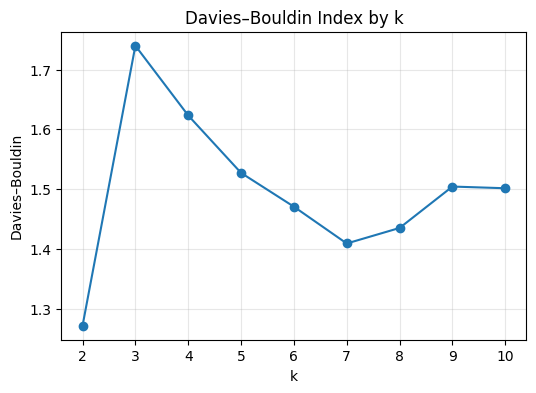

In [8]:
plt.figure(figsize=(6,4))
plt.plot(res_df.index, res_df['davies_bouldin'], marker='o')
plt.title('Davies–Bouldin Index by k')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin')
plt.grid(True, alpha=0.3)
plt.show()

# Davies–Bouldin Index: Mede a média da razão entre a soma das dispersões dentro do cluster e a distância entre os clusters.
# Interpretação:
# Valores mais baixos indicam melhor separação entre os clusters.
# Um valor de 0 indica clusters perfeitamente separados.

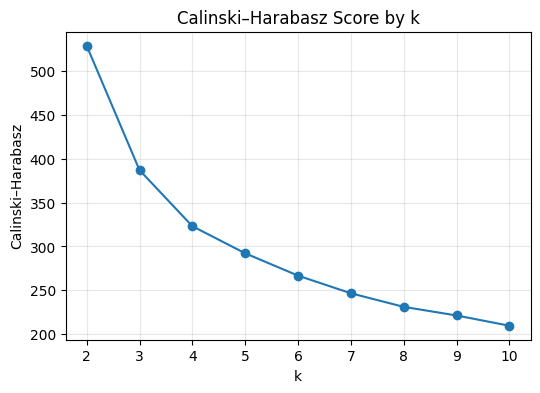

In [9]:
plt.figure(figsize=(6,4))
plt.plot(res_df.index, res_df['calinski_harabasz'], marker='o')
plt.title('Calinski–Harabasz Score by k')
plt.xlabel('k')
plt.ylabel('Calinski–Harabasz')
plt.grid(True, alpha=0.3)
plt.show()


# Calinski–Harabasz Score: Mede a razão entre a dispersão entre os clusters e a dispersão dentro dos clusters.
# Interpretação:
# Valores mais altos indicam melhor definição dos clusters.
# Não há um valor máximo definido, mas valores mais altos são preferíveis.

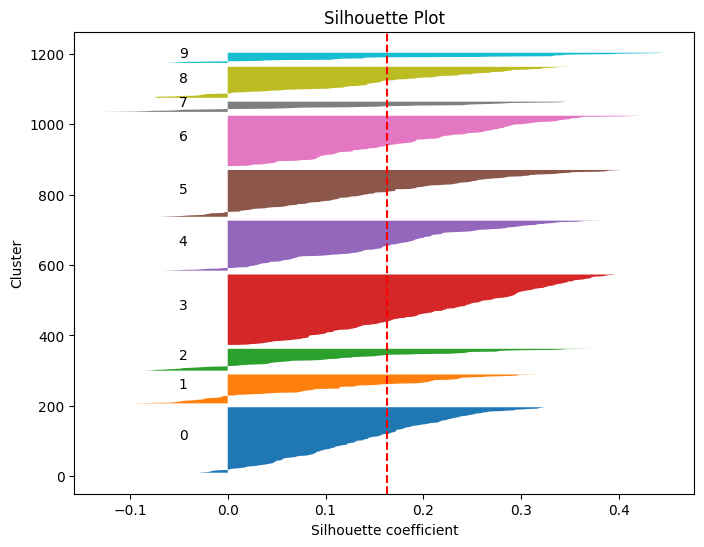

In [10]:
from sklearn.metrics import silhouette_samples
import numpy as np

sample_sil_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8,6))
y_lower = 10

for i in np.unique(labels):
    ith = sample_sil_vals[labels == i]
    ith.sort()
    size = ith.shape[0]
    y_upper = y_lower + size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith)
    plt.text(-0.05, y_lower + size/2, str(i))
    y_lower = y_upper + 10

plt.axvline(np.mean(sample_sil_vals), color="red", linestyle="--")
plt.title("Silhouette Plot")
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.show()

# PCA plot dos clusters
# Shilhouette Analysis: Avalia a qualidade dos clusters ao medir o quão semelhante um ponto de dados é ao seu próprio cluster em comparação com outros clusters.
# Interpretação:
# Valores próximos a +1 indicam que os pontos estão bem agrupados dentro do seu cluster
# Valores próximos a 0 indicam que os pontos estão próximos à fronteira entre dois clusters.
# Valores negativos indicam que os pontos podem estar atribuídos ao cluster errado.


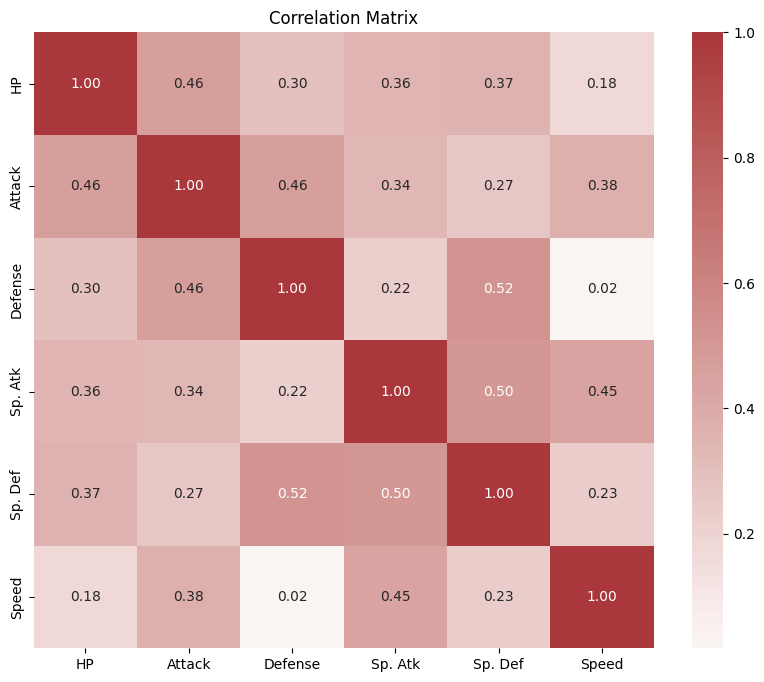

In [15]:

plt.figure(figsize=(10,8))
sns.heatmap(
    dataframe[numeric_cols].corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="vlag", 
    center=0
)
plt.title("Correlation Matrix")
plt.show()


# Correlação entre as variáveis numéricas
# A matriz de correlação mostra a relação linear entre as variáveis numéricas.
# Interpretação:
# Valores próximos a +1 indicam uma forte correlação positiva.
# Valores próximos a -1 indicam uma forte correlação negativa.
# Valores próximos a 0 indicam pouca ou nenhuma correlação.

In [16]:
# 6) escolher k ótimo (por silhouette primário; validar com DBI/CH)
best_k = int(res_df['silhouette'].idxmax())
print("\nMelhor k por silhouette:", best_k)


Melhor k por silhouette: 2


In [17]:
# 7) treinar modelo final com best_k (aumentar n_init para estabilidade)
final_km = KMeans(n_clusters=best_k, random_state=42, n_init=50, max_iter=500)
labels_final = final_km.fit_predict(X)
dataframe['cluster'] = labels_final

In [18]:
# 8) métricas finais
sil_final = silhouette_score(X, labels_final)
db_final = davies_bouldin_score(X, labels_final)
ch_final = calinski_harabasz_score(X, labels_final)
print(f"\nMetrica final (k={best_k}): silhouette={sil_final:.4f}, DBI={db_final:.4f}, CH={ch_final:.4f}")
print("Tamanho Cluster:\n", dataframe['cluster'].value_counts().sort_index())


Metrica final (k=2): silhouette=0.2928, DBI=1.2661, CH=528.8788
Tamanho Cluster:
 cluster
0    626
1    478
Name: count, dtype: int64


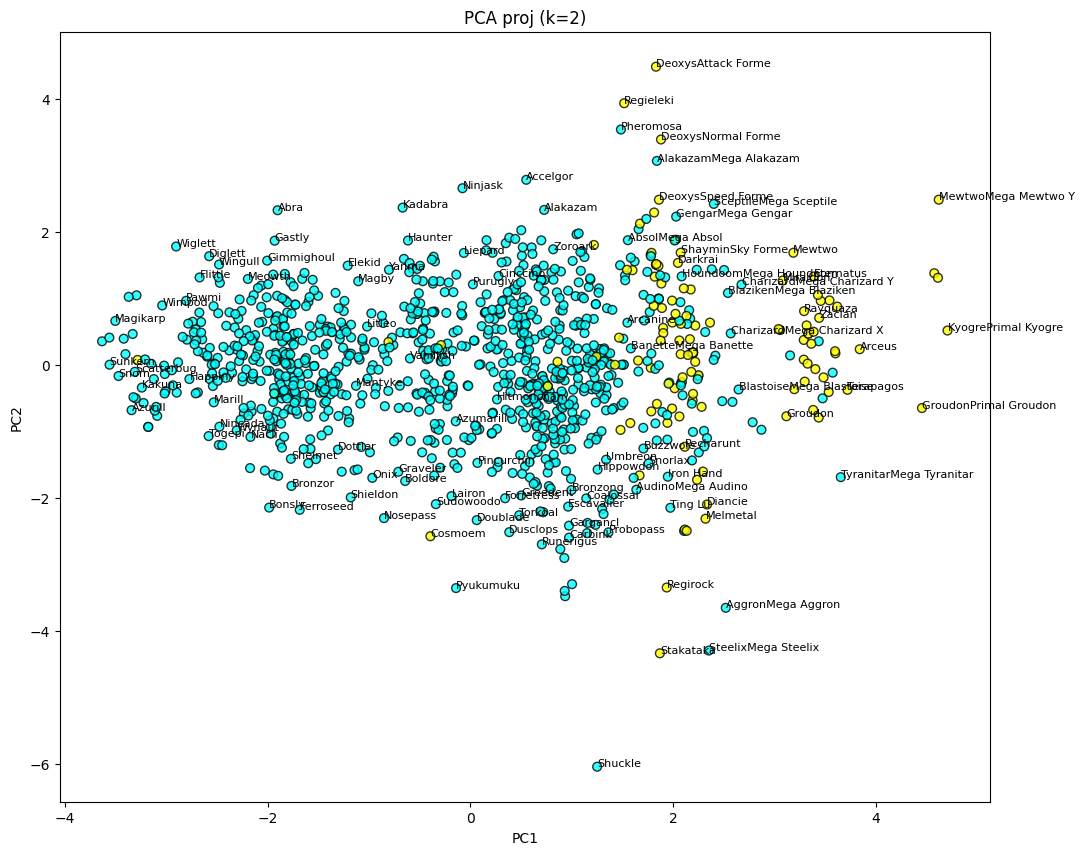

In [19]:
# PCA 2D visualization with labels
#pca = PCA(n_components=2)
#proj = pca.fit_transform(X)
#
#plt.figure(figsize=(12,10))
#plt.scatter(proj[:,0], proj[:,1], c=labels_final, cmap='tab10', s=40, alpha=0.7)
#
## Escrever o nome de cada Pokémon no ponto
#for i, name in enumerate(names):
#    plt.text(proj[i,0], proj[i,1], name, fontsize=6)
#
#plt.title(f"PCA proj (k={best_k})")
#plt.xlabel('PC1')
#plt.ylabel('PC2')
#plt.show()


# 1. PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# 2. Criar vetor de cores: lendários = amarelo, não-lendários = ciano
cores = np.where(dataframe["Legendary"] == True, "yellow", "cyan")

# 3. Calcular densidade local via distância ao vizinho mais próximo
nbrs = NearestNeighbors(n_neighbors=2).fit(proj)
distances, _ = nbrs.kneighbors(proj)
densidade = distances[:, 1]  # menor distância ao vizinho

# 4. threshold: pegar apenas os 10% mais isolados
limite = np.percentile(densidade, 90)

# 5. Plot PCA com lendários amarelos
plt.figure(figsize=(12,10))
plt.scatter(
    proj[:,0],
    proj[:,1],
    c=cores,
    s=40,
    alpha=0.8,
    edgecolors=(0,0,0,0.15)   # borda suave
)

# 6. Escrever os nomes dos pontos isolados
for i, name in enumerate(names):
    if densidade[i] >= limite:
        plt.text(proj[i,0], proj[i,1], name, fontsize=8)

plt.title(f"PCA proj (k={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




# PC1 : direção no espaço de features onde o dataset possui a maior variação possível.
# “Qual combinação dos atributos mais diferencia os Pokémons?”

# PC2 : direção ortogonal a PC1 que captura a segunda maior variação no dataset.
# “Qual é a segunda combinação mais significativa dos atributos que diferencia os Pokémons?”

In [20]:
# Mostrar contribuição dos atributos para cada PC
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=['PC1', 'PC2']
)

print("\n===== LOADINGS DO PCA =====")
print(loadings)



===== LOADINGS DO PCA =====
           HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
PC1  0.406867  0.441833  0.386155  0.436136  0.445296  0.318786
PC2 -0.112200 -0.017209 -0.590249  0.339812 -0.199201  0.695391


In [21]:
# 13) estabilidade: rodar kmeans multiples seeds e comparar ARI-like consistency (here silhouette per seed)
seeds = [0,1,2,10,42,99,540]
sils = []
for s in seeds:
    km_s = KMeans(n_clusters=best_k, random_state=s, n_init=10)
    labels_s = km_s.fit_predict(X)
    sils.append(silhouette_score(X, labels_s))
print("\nSilhouette entre seeds:", dict(zip(seeds, sils)))


Silhouette entre seeds: {0: 0.2928355800224411, 1: 0.2930359581674958, 2: 0.29298199378409834, 10: 0.2930359581674958, 42: 0.2930359581674958, 99: 0.2930359581674958, 540: 0.2930359581674958}


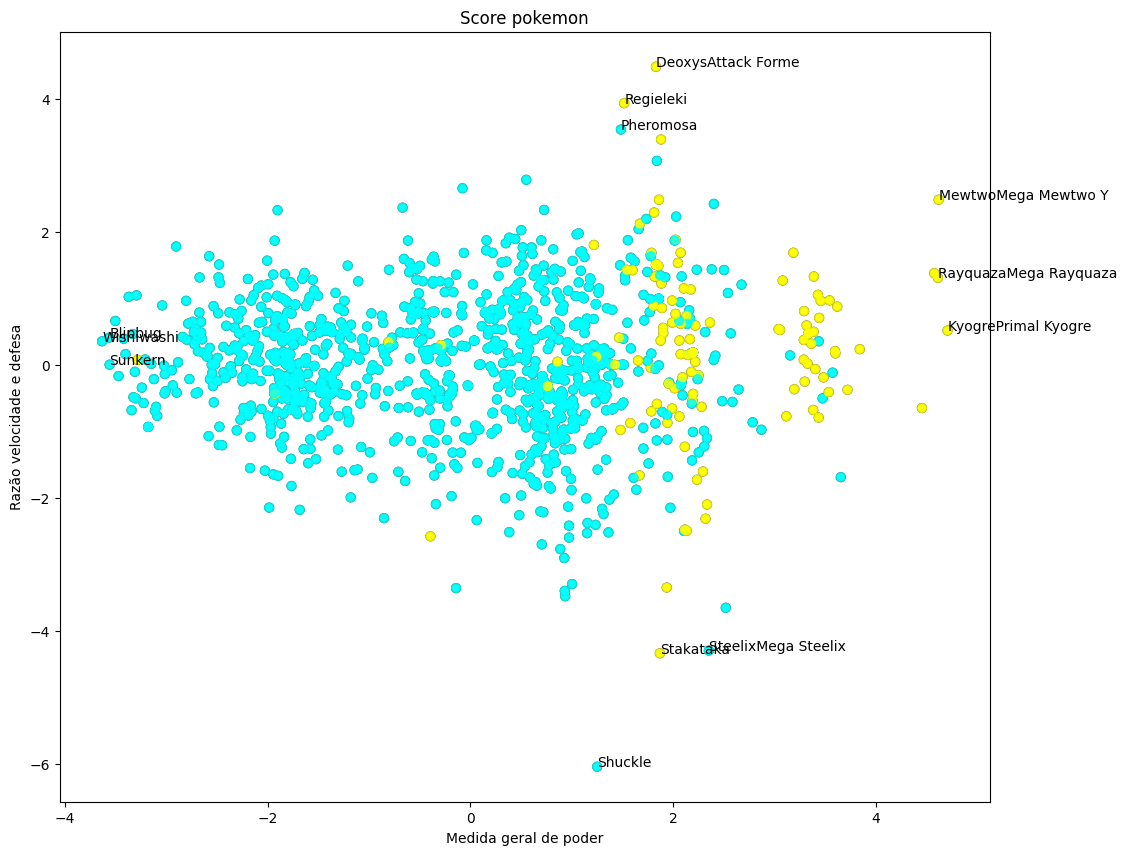

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X)



# Criar vetor de cores: lendários = amarelo, não-lendários = ciano
cores = np.where(dataframe["Legendary"] == True, "yellow", "cyan")

# Calcular densidade local via distância ao vizinho mais próximo
nbrs = NearestNeighbors(n_neighbors=2).fit(proj)
distances, _ = nbrs.kneighbors(proj)
densidade = distances[:, 1]  # menor distância ao vizinho

# threshold: pegar apenas os 10% mais isolados
limite = np.percentile(densidade, 90)

# Plot PCA com lendários amarelos
plt.figure(figsize=(12,10))
plt.scatter(
    proj[:,0],
    proj[:,1],
    c=cores,
    s=40,
    alpha=0.8,
    edgecolors=(0,0,0,0.15)   # borda suave
)



# proj[:,0] = PCA X-axis
# proj[:,1] = PCA Y-axis

# --- 1. Get indexes for each extreme side ---

left3   = np.argsort(proj[:,0])[:3]      # 3 smallest X
right3  = np.argsort(proj[:,0])[-3:]     # 3 largest X
down3   = np.argsort(proj[:,1])[:3]      # 3 smallest Y
up3     = np.argsort(proj[:,1])[-3:]     # 3 largest Y

# Combine all indexes (might contain duplicates)
extreme_idxs = list(left3) + list(right3) + list(down3) + list(up3)

# Optional: remove duplicates
extreme_idxs = list(dict.fromkeys(extreme_idxs))  # preserves order

plt.scatter(proj[:,0], proj[:,1], c=cores, s=40, alpha=0.8)

for idx in extreme_idxs:
    #plt.scatter(proj[idx,0], proj[idx,1], s=200,
    #            facecolors='none', edgecolors='red', linewidths=2)
    plt.text(proj[idx,0], proj[idx,1], dataframe.iloc[idx]["Name"],
             fontsize=10, color='black')

plt.title("Score pokemon")
plt.xlabel("Medida geral de poder")
plt.ylabel("Razão velocidade e defesa")
plt.show()

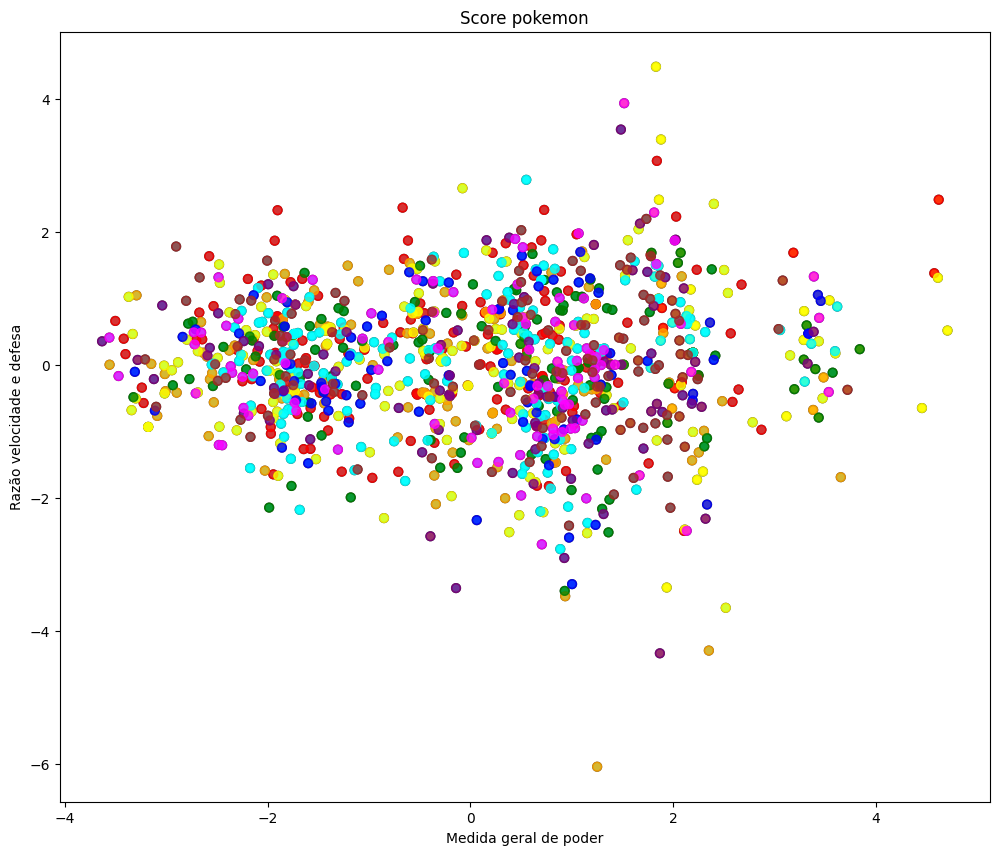

In [ ]:
# PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X)

from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Calcular densidade local via distância ao vizinho mais próximo
nbrs = NearestNeighbors(n_neighbors=2).fit(proj)
distances, _ = nbrs.kneighbors(proj)
densidade = distances[:, 1]  # menor distância ao vizinho

# threshold: pegar apenas os 10% mais isolados
limite = np.percentile(densidade, 90)

# Plot PCA com lendários amarelos
plt.figure(figsize=(12,10))
plt.scatter(
    proj[:,0],
    proj[:,1],
    c=cores,
    s=40,
    alpha=0.8,
    edgecolors=(0,0,0,0.15)   # borda suave
)

# Define colors manually for generations 1 to 9
gen_colors = {
    1: "red",
    2: "orange",
    3: "yellow",
    4: "green",
    5: "cyan",
    6: "blue",
    7: "purple",
    8: "magenta",
    9: "brown"
}

colors = dataframe["Generation"].map(gen_colors)

plt.scatter(proj[:,0], proj[:,1], c=colors, s=40, alpha=0.8)
plt.title("Todas as gerações pokemon")
plt.xlabel("Medida geral de poder")
plt.ylabel("Razão velocidade e defesa")
plt.show()


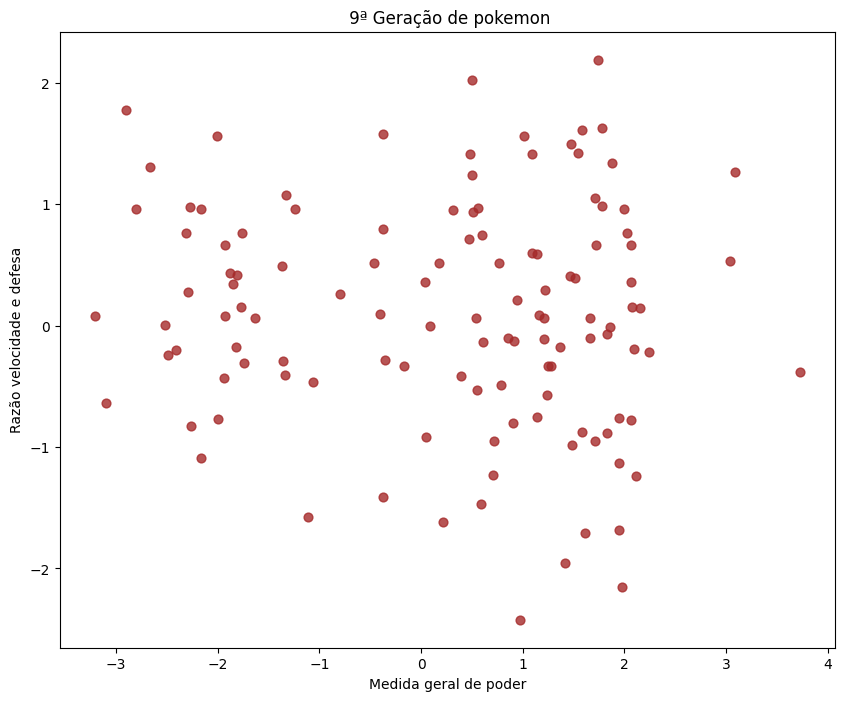

In [ ]:
import time
from IPython.display import clear_output # clears output in jupyter

gen = 1

while(gen <=9):
    clear_output(wait=True)

    # Filter the dataframe
    df_gen = dataframe[dataframe["Generation"] == gen]

    # Filter the PCA projection the same way (use index alignment)
    proj_gen = proj[df_gen.index]

    plt.figure(figsize=(10,8))
    plt.scatter(
        proj_gen[:,0],
        proj_gen[:,1],
        c=(gen_colors[gen]),
        s=40,
        alpha=0.8
    )

    plt.title(f" {gen}ª Geração de pokemon")
    plt.xlabel("Medida geral de poder")
    plt.ylabel("Razão velocidade e defesa")
    plt.show()
    time.sleep(2)
    gen += 1
    